In [2]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import os

In [20]:
def load_audio(file_path, target_sample_rate=16000):
    waveform, sample_rate = torchaudio.load(file_path)

    if sample_rate != target_sample_rate:
        resample_transform = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
        waveform = resample_transform(waveform)

    waveform = waveform / waveform.abs().max()
    if waveform.size(0) > 1:
        waveform = waveform[0:1, :]
    waveform = waveform.squeeze(0)

    return waveform, target_sample_rate


In [22]:
def compute_spectrogram(waveform, n_fft=1024, hop_length=512):
    spectrogram_transform = torchaudio.transforms.Spectrogram(n_fft=n_fft, hop_length=hop_length)
    spectrogram = spectrogram_transform(waveform.unsqueeze(0))  # Add batch dimension back
    return spectrogram.squeeze(0)

In [29]:
def plot_spectrograms(spectrograms, titles):
    fig, axs = plt.subplots(len(spectrograms), 1, figsize=(20, 5 * len(spectrograms)))
    
    for i, (spectrogram, title) in enumerate(zip(spectrograms, titles)):
        ax = axs[i]
        img = ax.imshow(10 * torch.log10(spectrogram + 1e-8).numpy(), 
                       origin='lower', 
                       aspect='auto', 
                       cmap='viridis')
        ax.set_title(title, fontsize=14)
        ax.set_xlabel("Frames", fontsize=12)
        ax.set_ylabel("Frequency bins", fontsize=12)
        
        fig.colorbar(img, ax=ax, format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

In [24]:
folder_path = r"C:\Users\HP\Documents\Mtech\Speech Understanding\Assignment\songs"  
file_extensions = [".mp3"]
song_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.splitext(f)[1] in file_extensions]


In [25]:
song_titles = [os.path.splitext(os.path.basename(f))[0] for f in song_paths]
genres = [title.split('_')[0] if '_' in title else "Unknown" for title in song_titles]


In [26]:
spectrograms = []
for path in song_paths:
    if os.path.exists(path):
        waveform, sample_rate = load_audio(path)
        spec = compute_spectrogram(waveform)
        spectrograms.append(spec)
    else:
        print(f"Error: File not found at {path}")

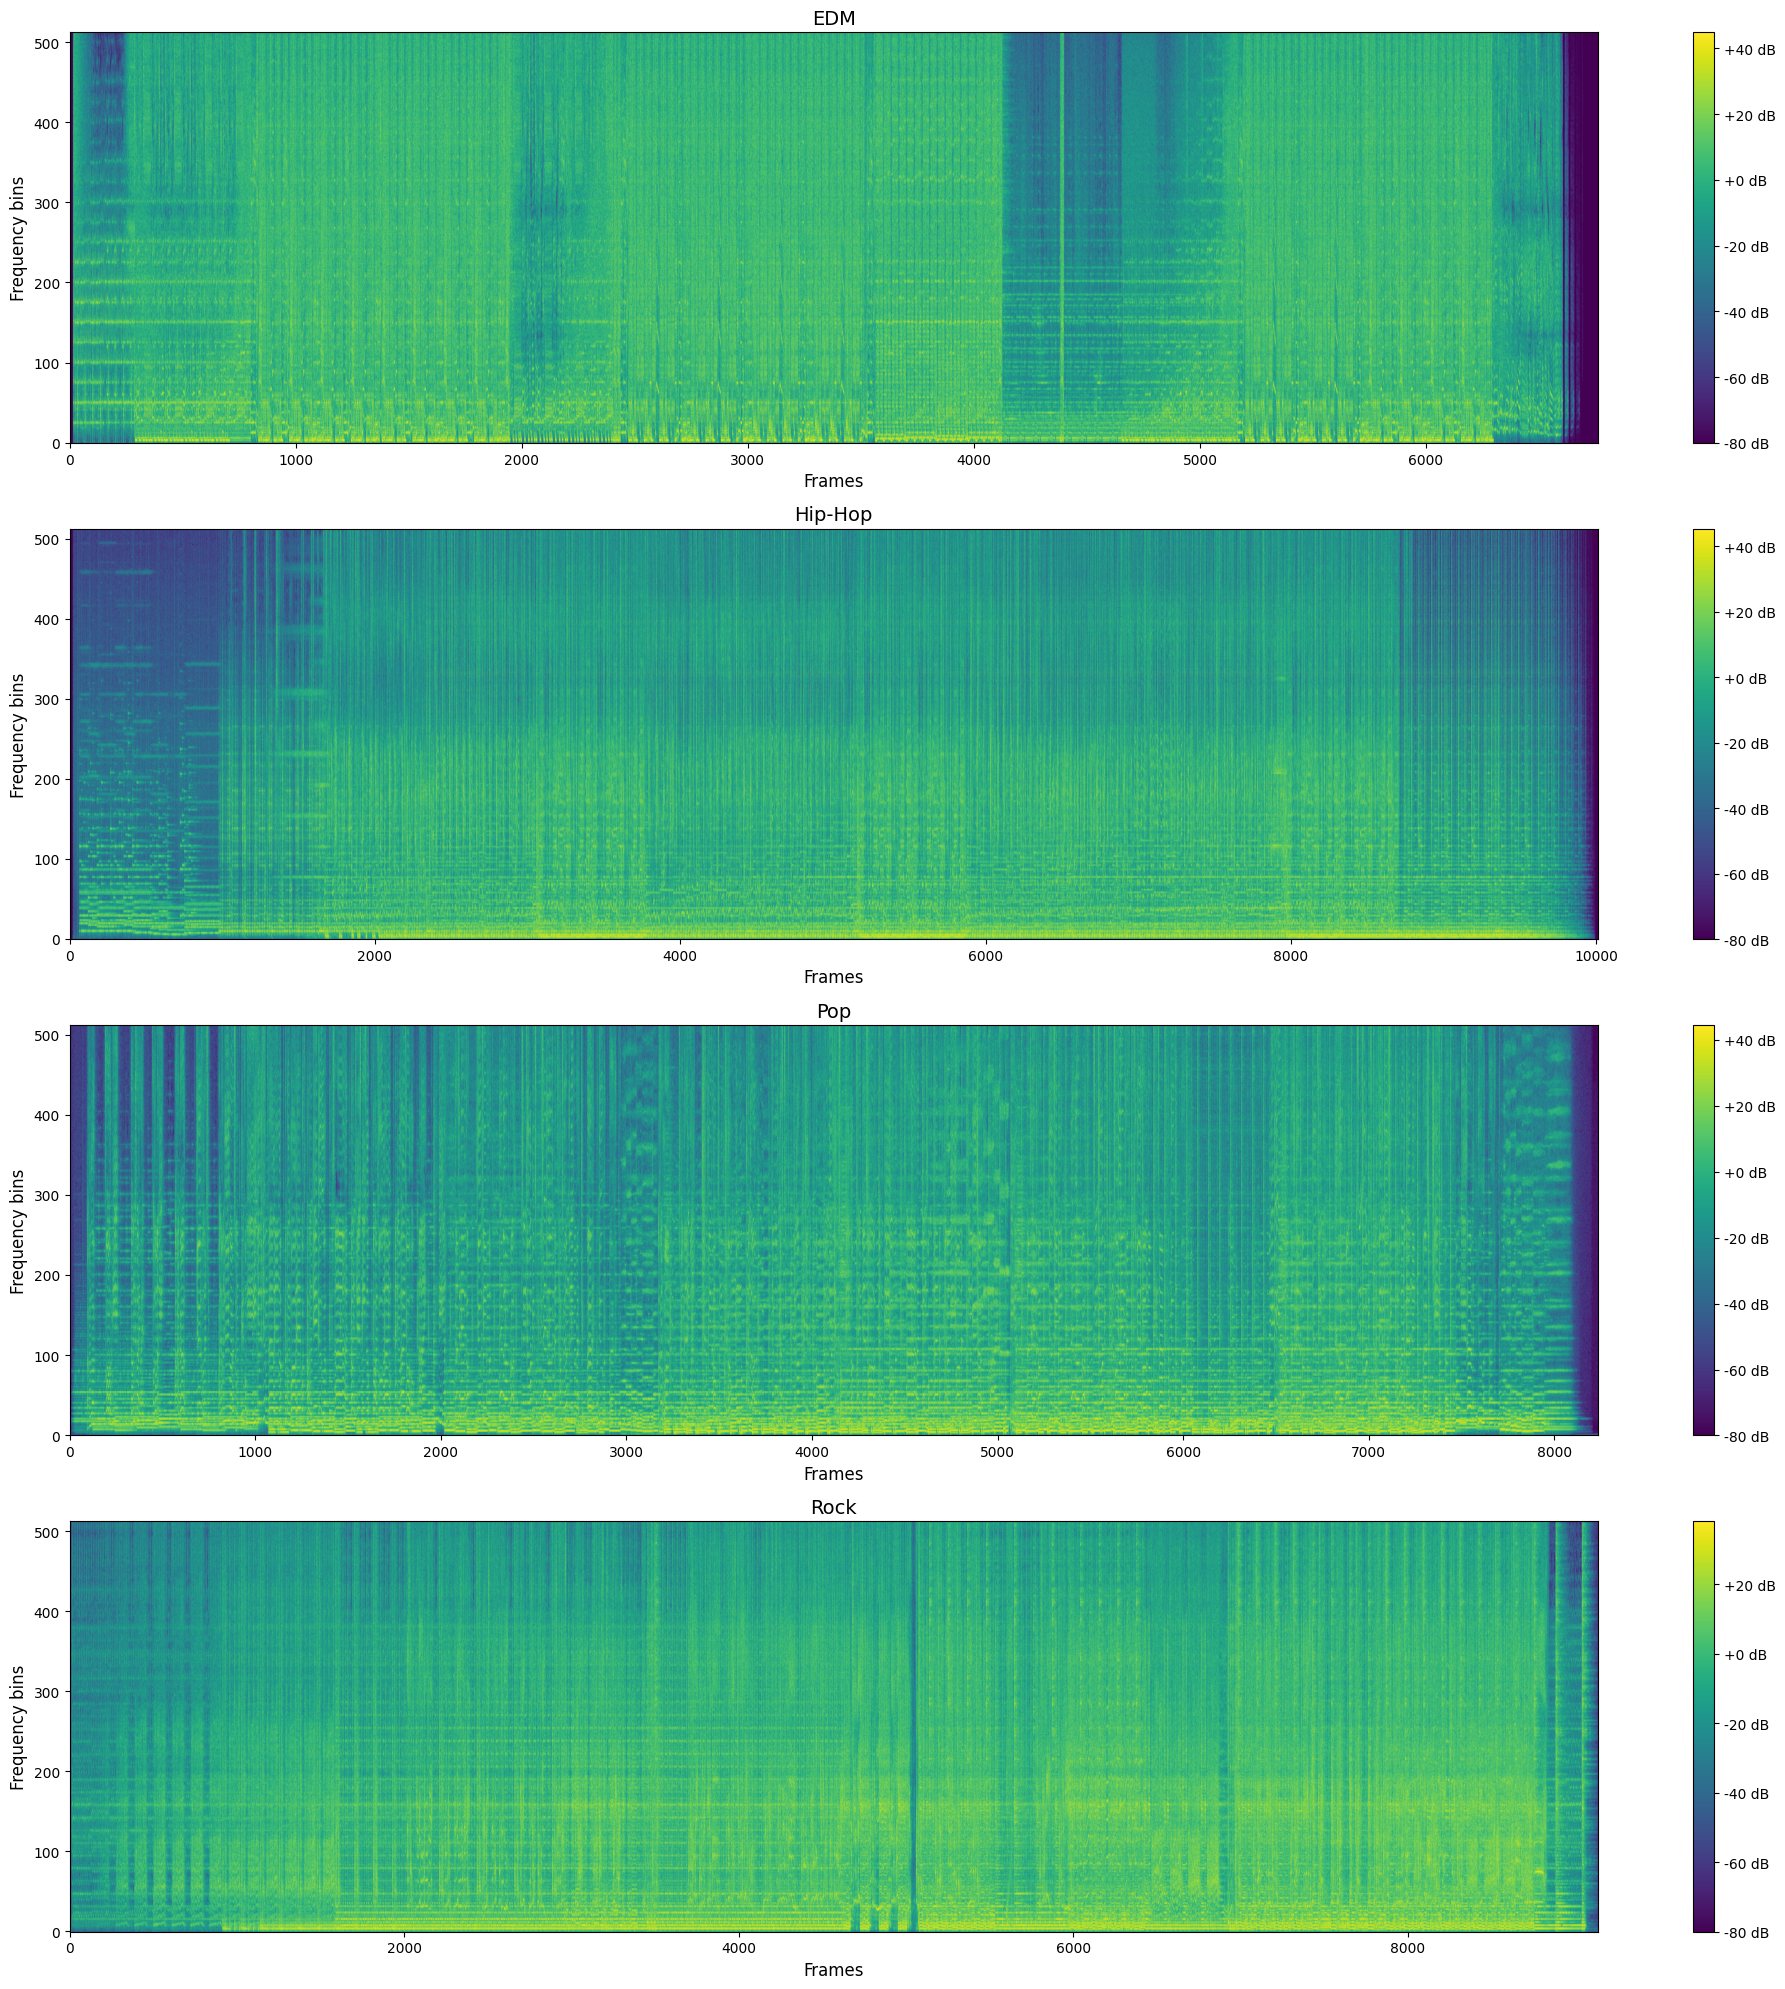

In [30]:
plot_spectrograms(spectrograms, genres)


In [31]:
for i, spec in enumerate(spectrograms):
    print(f"Analysis for {song_titles[i].split('_')[1]} ({genres[i]} genre):")
    print(f"- Spectrogram shape: {spec.shape}")
    print(f"- Min value: {spec.min().item()}, Max value: {spec.max().item()}")
    print(f"- Mean power: {torch.mean(10 * torch.log10(spec + 1e-8)).item()} dB")
    print("---------------------")


Analysis for Skrillex - Bangarang (Ft. Sirah) (EDM genre):
- Spectrogram shape: torch.Size([513, 6761])
- Min value: 0.0, Max value: 30528.203125
- Mean power: -2.439603567123413 dB
---------------------
Analysis for Eminem - Lose Yourself (Hip-Hop genre):
- Spectrogram shape: torch.Size([513, 10013])
- Min value: 0.0, Max value: 34942.37109375
- Mean power: -10.593720436096191 dB
---------------------
Analysis for Ed Sheeran - Perfect (Pop genre):
- Spectrogram shape: torch.Size([513, 8236])
- Min value: 0.0, Max value: 28713.576171875
- Mean power: -9.422518730163574 dB
---------------------
Analysis for Thunderstruck - ACDC (Rock genre):
- Spectrogram shape: torch.Size([513, 9139])
- Min value: 4.690825635319693e-33, Max value: 6511.01416015625
- Mean power: -4.060915470123291 dB
---------------------
